In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

import re
pd.set_option('display.max_colwidth', None)
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

[nltk_data] Downloading package stopwords to /Users/nofar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nofar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/nofar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('pos_and_neg_tweets_balanced_final.csv')
df.sample(5)

Unnamed: 0  Unnamed: 0.1        user_name                user_location  \
23675       23675         23675  Elizabe53836129                          NaN   
28217       28217         28217    VaccinePhotos                       mRNA 🧬   
9480         9480          9480           mazt_t  Minang country, southern WA   
27605       27605         27605  the_hub_forever                          NaN   
5867         5867          5867   PolinaSayessMD           New Hampshire, USA   

                                                                                                                                                   user_description  \
23675                                                                                                                  I love my family and 3 kids. I love my work.   
28217                                                 Pictures of HEROES saving lives by getting the COVID-19 vaccine shots. Inspire. #Covid19 #Photos #IGotTheShot   
9480                                     Political centrist, so now a 'lefty'. \nWe share the earth, we don't own it. Our job is to care.\nIt's not hard.\nGo #freo   
27605  Manchester United fan through and through \nenjoys the odd political debate\nnot guy in PFP btw\nall rights of the images used on my account go to the owner   
5867       Family Medicine physician at FrisbieMemorialHospital | NH delegate @AAFP Congress of Delegates | Member @NHMedSociety Council | President @AncestralDocs   

              user_created  user_followers                 date  \
23675  2020-08-20 16:55:36               7  2021-02-07 01:36:42   
28217  2009-12-30 05:52:36             293  2021-01-23 09:40:50   
9480   2011-12-10 23:29:48             768  2021-02-15 00:28:21   
27605  2021-02-05 22:22:38               8  2021-02-06 01:39:11   
5867   2017-11-03 13:16:35             254  2021-02-09 00:21:57   

                                                                                                                                                 text  \
23675                    Do not Believe the #antivaxxers they are causing California to look bad and they are not from here.… https://t.co/IItvRK6Ymr   
28217    RT @DrT_LeBaron: 7 days post 2nd Pfizer vaccination and still feeling great! Able to do winter hiking! Let’s get everyone safe and vaccinat…   
9480     @selfunded @jonkudelka I think of the kids I was in school with their heavy iron callipers and deformities from pol… https://t.co/Xz6UU3ukGL   
27605   Everyone who is contacted or in the category to get the vaccine please do!\nThere's nothing in the vaccines that wil… https://t.co/XYcZGxMRAg   
5867   Got my 2nd COVID-19 shot, Moderna. \n\nSome fatigue for one day and arm soreness for 3 days after the first dose.  No… https://t.co/3hVJXemVrx   

       favorites  retweets  is_retweet  category        user_location_updated  \
23675          0         0       False  Negative                          NaN   
28217          0         2        True  Positive                        mRNA    
9480           4         1        True  Negative  Minang country, southern WA   
27605          0         0       False  Negative                          NaN   
5867           3         1        True  Positive           New Hampshire, USA   

      user-country_code   user-country  
23675               NaN            NaN  
28217               NaN            NaN  
9480                NaN            NaN  
27605               NaN            NaN  
5867                USA  United States

In [3]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36696 entries, 0 to 36695
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             36696 non-null  int64 
 1   Unnamed: 0.1           36696 non-null  int64 
 2   user_name              36696 non-null  object
 3   user_location          26430 non-null  object
 4   user_description       32793 non-null  object
 5   user_created           36696 non-null  object
 6   user_followers         36696 non-null  int64 
 7   date                   36696 non-null  object
 8   text                   36696 non-null  object
 9   favorites              36696 non-null  int64 
 10  retweets               36696 non-null  int64 
 11  is_retweet             36696 non-null  bool  
 12  category               36696 non-null  object
 13  user_location_updated  26235 non-null  object
 14  user-country_code      15116 non-null  object
 15  user-country       

((36696, 16), None)

In [4]:
df.describe(include='all')

Unnamed: 0  Unnamed: 0.1   user_name    user_location  \
count   36696.000000  36696.000000       36696            26430   
unique           NaN           NaN       10993             4257   
top              NaN           NaN  Nakhasi_MD  Los Angeles, CA   
freq             NaN           NaN         574              720   
mean    18347.500000  18347.500000         NaN              NaN   
std     10593.367076  10593.367076         NaN              NaN   
min         0.000000      0.000000         NaN              NaN   
25%      9173.750000   9173.750000         NaN              NaN   
50%     18347.500000  18347.500000         NaN              NaN   
75%     27521.250000  27521.250000         NaN              NaN   
max     36695.000000  36695.000000         NaN              NaN   

                                                                                                                      user_description  \
count                                                                                                                            32793   
unique                                                                                                                            9797   
top     Doc in Compton | Policy Adviser. LA County Dept of Health Services, 2nd largest public system in US. Hopkins MD | Harvard MPP.   
freq                                                                                                                               574   
mean                                                                                                                               NaN   
std                                                                                                                                NaN   
min                                                                                                                                NaN   
25%                                                                                                                                NaN   
50%                                                                                                                                NaN   
75%                                                                                                                                NaN   
max                                                                                                                                NaN   

               user_created  user_followers                 date  \
count                 36696    3.669600e+04                36696   
unique                10992             NaN                14801   
top     2009-03-11 06:04:06             NaN  2021-02-06 15:11:56   
freq                    574             NaN                   16   
mean                    NaN    6.813570e+03                  NaN   
std                     NaN    9.450024e+04                  NaN   
min                     NaN    0.000000e+00                  NaN   
25%                     NaN    1.490000e+02                  NaN   
50%                     NaN    6.100000e+02                  NaN   
75%                     NaN    2.238000e+03                  NaN   
max                     NaN    8.623795e+06                  NaN   

                                                                                                                                                      text  \
count                                                                                                                                                36696   
unique                                                                                                                                                8187   
top     RT @NickHudsonCT: Raising conflicts of interest DOES NOT make you a conspiracy theorist.\n\nQuerying safety &amp; efficacy DOES NOT make you anti…   
freq                                                                                               

## Preprocessing:
### 1. Taking care of Nas

In [5]:
print(f'Dataset dimensions: {df.shape}')
print(f'Dataset has NAs?: {df.isna().any().any()}, so the number of Nas is: {df.isna().sum().sum()}')
print(f'Dataset data types:\n{df.dtypes.value_counts()}')

Dataset dimensions: (36696, 16)
Dataset has NAs?: True, so the number of Nas is: 67790
Dataset data types:
object    10
int64      5
bool       1
dtype: int64


In [6]:
df.isna().sum()

Unnamed: 0                   0
Unnamed: 0.1                 0
user_name                    0
user_location            10266
user_description          3903
user_created                 0
user_followers               0
date                         0
text                         0
favorites                    0
retweets                     0
is_retweet                   0
category                     0
user_location_updated    10461
user-country_code        21580
user-country             21580
dtype: int64

In [16]:
df.fillna({'user_location':'Unknown', "user_location_updated": 'Unknown', 'user-country':'Unknown'}, inplace=True)
df['user-country_code'].fillna('OTH', inplace=True)

In [17]:
print(f'Dataset has NAs?: {df.isna().any().any()}, so the number of Nas is: {df.isna().sum().sum()}')
print('all are from user_description feature')

Dataset has NAs?: True, so the number of Nas is: 3903
all are from user_description feature


### 2. drop unrelavent columns:

In [19]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'user_description', 'favorites'], axis=1, inplace=True)
df.sample(2)

user_name user_location         user_created  user_followers  \
15713  RespectElves       Unknown  2017-12-06 00:51:15            6957   
11227       turts__       Unknown  2010-01-17 21:23:52             134   

                      date  \
15713  2021-02-08 12:45:51   
11227  2021-02-16 17:39:13   

                                                                                                                                               text  \
15713         I'm not antivaxx for myself because I'm not really concerned in if shit fucks me up. I licked an asbestos wall for $5 in high school.   
11227  @StephenBevan15 @jayne_puligan @MrsSarahMurray @mcalpine_dale @Paul43485600 @JuliaHB1 The smiley brigade believe th… https://t.co/ZaDfRl9yod   

       retweets  is_retweet  category user_location_updated user-country_code  \
15713         4        True  Negative               Unknown               OTH   
11227         0       False  Negative               Unknown               OTH   

      user-country  
15713      Unknown  
11227      Unknown

## Taking care of specific columns:
### 1. date column:

In [20]:
df['date'] = df['date'].apply(lambda x: x.split('+')[0])
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [21]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek
df['date_only'] = df['date'].dt.date

In [22]:
tweets_agg_df = df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

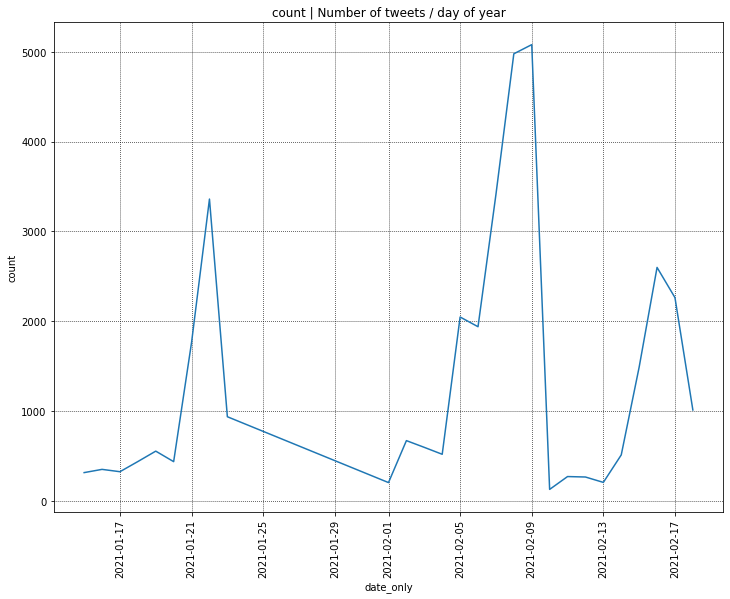

In [23]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

In [24]:
df.date.min(), df.date.max()

(Timestamp('2021-01-15 03:10:18'), Timestamp('2021-02-18 14:20:06'))

**NOTE:** \
Right now we have data of 1 month

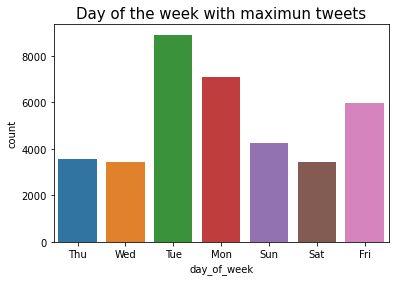

In [25]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["day_of_week"] = df["day_of_week"].map(dmap)
plt.title("Day of the week with maximun tweets", fontsize=15)
sns.countplot(df["day_of_week"]);

### 2. the target column (category):

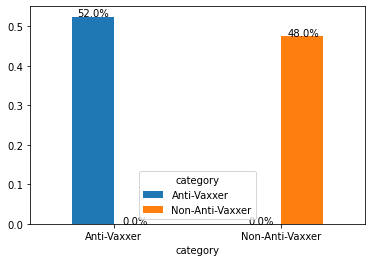

In [30]:
category_string_dict = {"Negative": "Anti-Vaxxer", "Positive":"Non-Anti-Vaxxer"}
ax = pd.crosstab(df['category'].map(category_string_dict), 
            df['category'].map(category_string_dict), normalize=True).plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(f'{round(p.get_height(),2)*100}%', (p.get_x()+p.get_width()/2., p.get_height()),
                 textcoords='offset points', ha='center')
plt.show()

**NOTE:** \
The Data seems balanced enough

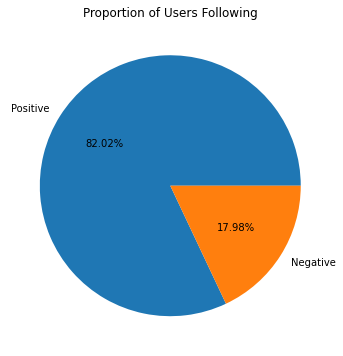

In [31]:
total_positive_followers = df[df['category']=='Positive']\
                                  .sort_values('user_followers', ascending=False)\
                                  .drop_duplicates(subset=['user_name']).user_followers.sum()

total_negative_followers = df[df['category']=='Negative']\
                              .sort_values('user_followers', ascending=False)\
                              .drop_duplicates(subset=['user_name']).user_followers.sum()

total_followers = total_positive_followers + total_negative_followers

verified_labels = ['Positive', 'Negative']

verified_count = [total_positive_followers / total_followers * 100, 
                  total_negative_followers / total_followers * 100]

plt.figure(figsize=(6,6))
plt.title("Proportion of Users Following")
plt.pie(verified_count, labels = verified_labels,autopct='%1.2f%%')
plt.show()

### 3. text column

In [32]:
df["up_text"] = df.text.str.lower()
#Remove twitter handlers
df.up_text = df.up_text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
df.up_text = df.up_text.apply(lambda x:re.sub(r'\B#\S+','',x))

# Remove URLS
df.up_text = df.up_text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
df.up_text = df.up_text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
df.up_text = df.up_text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
df.up_text = df.up_text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [33]:
df['hashtags'] =  df.text.str.lower()
df.hashtags = df.hashtags.apply(lambda x:re.sub('@[^\s]+','',x)) 
df.hashtags = df.hashtags.apply(lambda x:re.sub(r"http\S+", "", x))
df.hashtags = df.hashtags.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df.hashtags = df.hashtags.apply(lambda x: x if '#' in x else '')
df.hashtags = df.hashtags.apply(lambda x: [i for i in x.split() if i.startswith('#')])

#### - expand contractions:

In [34]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not ","'s":" is ","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['up_text']=df['up_text'].apply(lambda x:expand_contractions(x))

In [35]:
for index,text in enumerate(df['up_text'][35:40]):
    print('tweet %d:\n'%(index+1),text)

tweet 1:
 rt thank you and all volunteers working the vaccine clinic this team has provided over 70 of our employees a
tweet 2:
 rt looking at how hard these scientists have probably worked to get this vaccine made in suchshort amount of time says icu
tweet 3:
 rt thank you and all volunteers working the vaccine clinic this team has provided over 70 of our employees a
tweet 4:
 thank you and all volunteers working the vaccine clinic this team has provided over 70 of our em
tweet 5:
 rt kentuckycovid 19 vaccine program to getsupply boost of more than 20 next week


#### - create tokenized column with no stop words:

In [36]:
df['tokenized'] = df['up_text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words and word != 'rt'])
df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)

In [37]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
df['tokenized'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

In [38]:
wnl = WordNetLemmatizer()
df['tokenized'] = df['tokenized'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

In [39]:
df.tokenized

0                                                     [see, kentuckyupdate, vaccine, website, vaccine, hotline, help]
1                                                                                                           [chipped]
2                                                                                                           [chipped]
3        [holly, broce, president, opioid, treatment, program, otp, division, kelly, priegnitz, chief, legal, compli]
4                   [rtcovid, 19, vaccine, update, thread, vaccinate, 8, 500, people, covid, 19, amount, vaccination]
                                                             ...                                                     
36691            [raise, conflict, interest, make, youconspiracy, theorist, query, safety, amp, efficacy, make, anti]
36692            [raise, conflict, interest, make, youconspiracy, theorist, query, safety, amp, efficacy, make, anti]
36693            [raise, conflict, interest, make, youco

### Visualization (tex and hashtags)

##### Top 100 words

In [40]:
words = df['tokenized']
allwords = []
for wordlist in words:
    allwords += wordlist
allwords = [word for word in allwords if word !='amp']

In [41]:
words_neg = df.loc[df['category']=='Negative','tokenized']
allwords_neg = []
for wordlist in words_neg:
    allwords_neg += wordlist
allwords_neg = [word for word in allwords_neg if word !='amp']

words_pos = df[df['category']=='Positive']['tokenized']
allwords_pos = []
for wordlist in words_pos:
    allwords_pos += wordlist
words_pos = [word for word in words_pos if word !='amp']

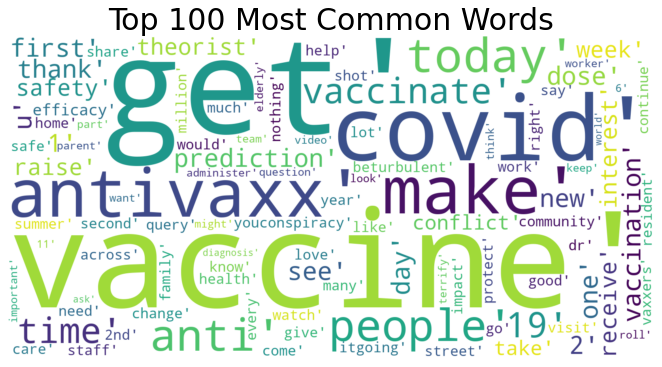

In [42]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))

fig = plt.figure(figsize=(9,7), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=30)
plt.tight_layout(pad=0)
plt.show()

##### top 100 hashtags

In [43]:
hasht = df['hashtags']
hashtags = []
for wordlist in hasht:
    hashtags += wordlist

hash_neg = df[df['category']=='Negative']['hashtags']
hashtags_neg = []
for wordlist in hash_neg:
    hashtags_neg += wordlist

hash_pos = df[df['category']=='Positive']['hashtags']
hashtags_pos = []
for wordlist in hash_pos:
    hashtags_pos += wordlist

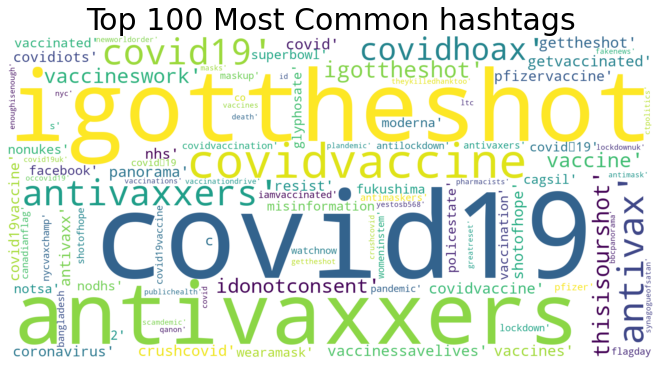

In [44]:
mostcommon = FreqDist(hashtags).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))

fig = plt.figure(figsize=(9,7), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common hashtags', fontsize=30)
plt.tight_layout(pad=0)
plt.show()

##### top 100 negative hashtags

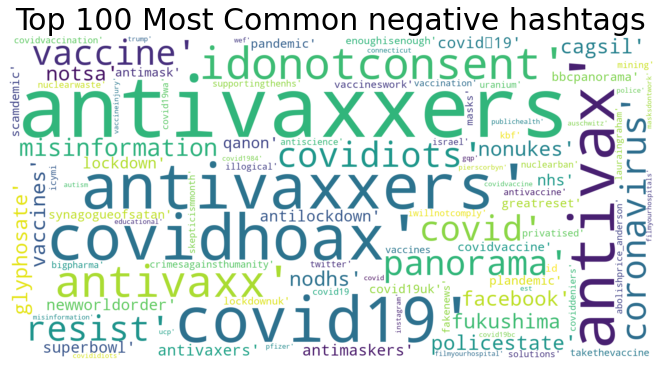

In [45]:
mostcommon = FreqDist(hashtags_neg).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))

fig = plt.figure(figsize=(10,7), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common negative hashtags', fontsize=30)
plt.tight_layout(pad=0)
plt.show()

##### top 100 positive hashtags

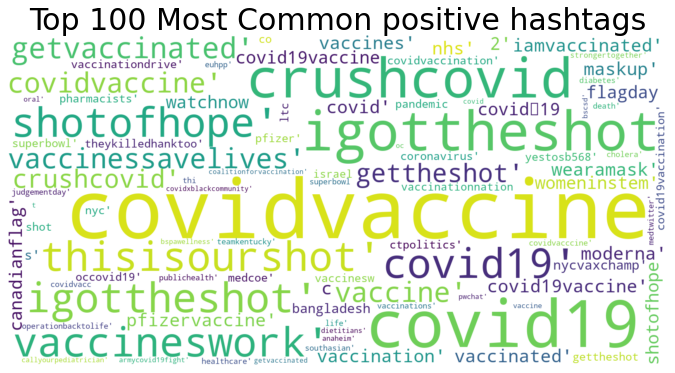

In [46]:
mostcommon = FreqDist(hashtags_pos).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))

fig = plt.figure(figsize=(10,7), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common positive hashtags', fontsize=30)
plt.tight_layout(pad=0)
plt.show()

#### most common words (text):

In [47]:
com_words, times = zip(*FreqDist(allwords).most_common(50))
mini_df = pd.DataFrame(data={'Common Words':com_words, 'count':times})
fig = px.treemap(mini_df, path=['Common Words'], values='count',title='50 Most Common Words In Tweets')
fig.show()

In [48]:
com_neg, ntimes = zip(*FreqDist(allwords_neg).most_common(50))
mini_n = pd.DataFrame(data={'Common Negative Words':com_neg, 'count':ntimes})
fig = px.treemap(mini_n, path=['Common Negative Words'], values='count',title='50 Most Common Negative Words In Tweets')
fig.show()

In [49]:
com_pos, ptimes = zip(*FreqDist(allwords_pos).most_common(50))
mini_p = pd.DataFrame(data={'Common Positive Words':com_pos, 'count':ptimes})
fig = px.treemap(mini_p, path=['Common Positive Words'], values='count',title='50 Most Common Positive Words In Tweets')
fig.show()

### 4. location column:

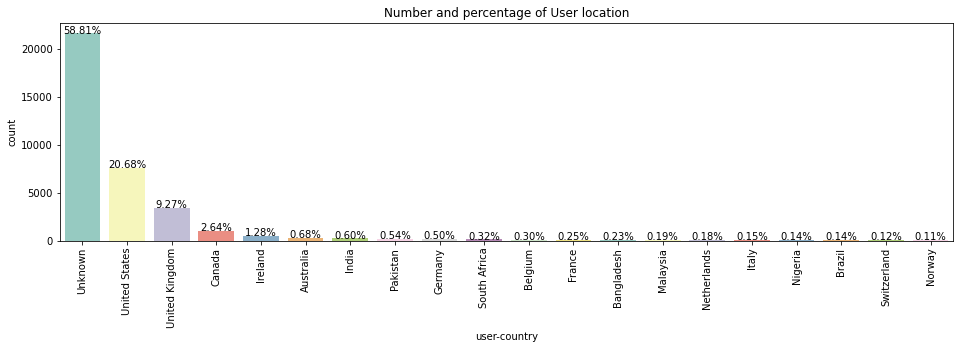

In [53]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature])
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=10)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

plot_count("user-country", "User location", df,4)

### 5. User column (analysis):

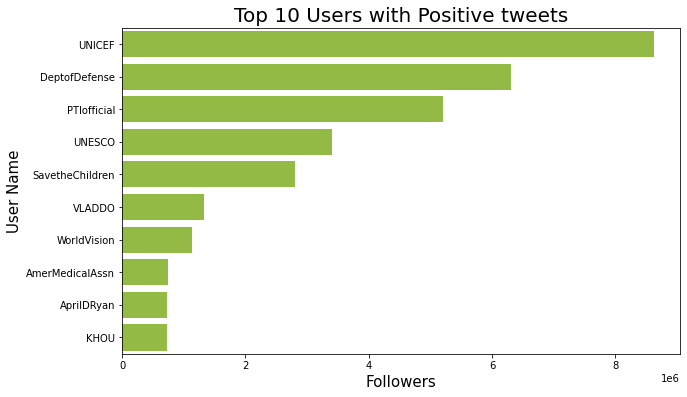

In [59]:
plt.figure(figsize=(10,6))
followers_count = list(df[df['category']=='Positive'].sort_values('user_followers', ascending=False)\
                              .drop_duplicates(subset=['user_name'])[:10].user_followers)
user_name = list(df[df['category']=='Positive'].sort_values('user_followers', ascending=False)\
                        .drop_duplicates(subset=['user_name'])[:10].user_name)
sns.barplot(followers_count, user_name, color='yellowgreen')            
plt.title("Top 10 Users with Positive tweets", fontsize=20)
plt.xlabel("Followers", fontsize=15)
plt.ylabel("User Name", fontsize=15)
plt.show()


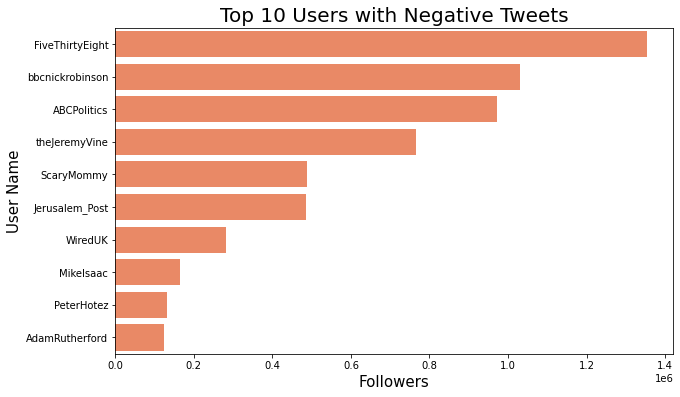

In [60]:
plt.figure(figsize=(10,6))
followers_count = list(df[df['category']=='Negative'].sort_values('user_followers', ascending=False)\
                              .drop_duplicates(subset=['user_name'])[:10].user_followers)
user_name = list(df[df['category']=='Negative'].sort_values('user_followers', ascending=False)\
                        .drop_duplicates(subset=['user_name'])[:10].user_name)
sns.barplot(followers_count, user_name, color='coral')           
plt.title("Top 10 Users with Negative Tweets", fontsize=20)
plt.xlabel("Followers", fontsize=15)
plt.ylabel("User Name", fontsize=15)
plt.show()